In [1]:
from threeML import *

import matplotlib.pyplot as plt

%matplotlib inline


WARNING CppInterfaceNotAvailable: The cthreeML package is not installed. You will not be able to use plugins which require the C/C++ interface (currently HAWC)


WARNING NaimaNotAvailable: The naima package is not available. Models that depend on it will not be available


WARNING GSLNotAvailable: The GSL library or the pygsl wrapper cannot be loaded. Models that depend on it will not be available.




Did you try to import pygsl in the build directory?

Well, that does not work out of the box. If you want to do that, please
use
      python setup.py build_ext -i
to add the necessary extension module in the local pygsl/ directory!

Please read the README first! Any further questions or missing information
please post to pygsl-discuss@lists.sourceforge.net!

Loading xspec models...


WARNING RuntimeWarning: The current value of the parameter switch was above the new maximum 1.0.


WARNING RuntimeWarning: The current value of the parameter specfile was above the new maximum 1.0.



done



WARNING UserWarning: ROOT minimizer not available



Configuration read from /Users/jburgess/.threeML/threeML_config.yml



WARNING CannotImportPlugin: Could not import plugin /usr/local/Cellar/python/HEAD/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/threeML-0.3.2-py2.7.egg/threeML/plugins/FermiGBM_TTE_Like.py. Do you have the relative instrument software installed and configured?


WARNING CannotImportPlugin: Could not import plugin /usr/local/Cellar/python/HEAD/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/threeML-0.3.2-py2.7.egg/threeML/plugins/FermiLATLike.py. Do you have the relative instrument software installed and configured?


WARNING CannotImportPlugin: Could not import plugin /usr/local/Cellar/python/HEAD/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/threeML-0.3.2-py2.7.egg/threeML/plugins/HAWCLike.py. Do you have the relative instrument software installed and configured?


WARNING CannotImportPlugin: Could not import plugin /usr/local/Cellar/python/HEAD/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/thre

In [2]:
triggerName = 'bn090217206'
ra = 204.9
dec = -8.4

#Data are in the current directory

datadir = os.path.abspath('.')

#Create an instance of the GBM plugin for each detector
#Data files
obsSpectrum = os.path.join( datadir, "bn090217206_n6_srcspectra.pha{1}" )
bakSpectrum = os.path.join( datadir, "bn090217206_n6_bkgspectra.bak{1}" )
rspFile     = os.path.join( datadir, "bn090217206_n6_weightedrsp.rsp{1}" )

#Plugin instance
NaI6 = OGIPLike( "NaI6", obsSpectrum, bakSpectrum, rspFile )

#Choose energies to use (in this case, I exclude the energy
#range from 30 to 40 keV to avoid the k-edge, as well as anything above
#950 keV, where the calibration is uncertain)
NaI6.set_active_measurements( "10.0-30.0", "40.0-950.0" )


Auto-probed noise models:
- observation: poisson
- background: gaussian
Range 10.0-30.0 translates to channels 4-20
Range 40.0-950.0 translates to channels 26-125
Now using 117 channels out of 128


In [3]:
#This declares which data we want to use. In our case, all that we have already created.

data_list = DataList( NaI6 )

In [4]:
powerlaw = Powerlaw()
cpl= Cutoff_powerlaw()

In [5]:
GRB = PointSource( triggerName, ra, dec, spectral_shape=powerlaw )
GRB2 = PointSource( triggerName, ra, dec, spectral_shape=cpl )

In [6]:
model = Model( GRB )
model2 = Model( GRB2 )

In [13]:
jl = JointLikelihood( model, data_list, verbose=False )

res = jl.fit()


jl2 = JointLikelihood( model2, data_list, verbose=False )

res = jl2.fit()

Best fit values:



#,Name,Best fit value,Unit
0,bn090217206.spectrum.main.Powerlaw.K,2.53 +/- 0.17,1 / (cm2 keV s)
1,bn090217206.spectrum.main.Powerlaw.index,-1.183 +/- 0.013,



NOTE: errors on parameters are approximate. Use get_errors().

(no nuisance parameters)

Correlation matrix:



1.00,-0.97
-0.97,1.00



Values of -log(likelihood) at the minimum:



,-log(likelihood)
total,869.098922
NaI6,869.098922


Best fit values:



#,Name,Best fit value,Unit
0,bn090217206.spectrum.main.Cutoff_powerlaw.K,0.5 +/- 1.2,1 / (cm2 keV s)
1,bn090217206.spectrum.main.Cutoff_powerlaw.index,-0.7 +/- 0.7,
2,bn090217206.spectrum.main.Cutoff_powerlaw.xc,(4 +/- 4)e+02,keV



NOTE: errors on parameters are approximate. Use get_errors().

(no nuisance parameters)

Correlation matrix:



1.00,-1.00,1.00
-1.00,1.00,-1.00
1.00,-1.00,1.00



Values of -log(likelihood) at the minimum:



,-log(likelihood)
total,815.409956
NaI6,815.409956


In [8]:
#bn090217206.spectrum.main.Powerlaw.K	2.57 -0.19 +0.22	1 / (cm2 keV s)
#bn090217206.spectrum.main.Powerlaw.index	-1.185 -0.015 +0.014	


res = jl.get_errors()

Name,Value,Unit
bn090217206.spectrum.main.Powerlaw.K,2.53 -0.20 +0.20,1 / (cm2 keV s)
bn090217206.spectrum.main.Powerlaw.index,-1.183 -0.015 +0.015,


Found a better minimum: 815.413403469 with bn090217206.spectrum.main.Powerlaw.index = -1.3. Run again your fit starting from here.


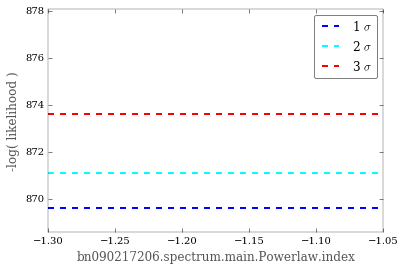

In [14]:
res = jl.get_contours(powerlaw.index,-1.3,-1.1,20)

In [8]:
from threeML.utils.stats_tools import ModelComparison

In [9]:
m=ModelComparison(jl,jl2)

In [12]:
m.report(precision=5)

,Model,-2 ln(like),AIC,BIC,N. Free Parameters,dof
0,Powerlaw,1738.19882,1742.19882,1747.72317,2,115
1,Cutoff_powerlaw,1630.83221,1636.83221,1645.11873,3,114


In [14]:
m.statistical_dataframe

,-2 ln(like),AIC,BIC,Model,N. Free Parameters,dof
0,1738.198821,1742.198821,1747.723169,Powerlaw,2,115
1,1630.832205,1636.832205,1645.118727,Cutoff_powerlaw,3,114


In [16]:
np.sum( [ data.get_number_of_data_points()    for data in jl.data_list.values()  ]  )

128

In [19]:
m._compute_mle_statistcs()

,-2 ln(like),AIC,BIC,Model,dof
0,1738.197778,1742.197778,1747.901839,Powerlaw,126
1,1630.826807,1636.826807,1645.382898,Cutoff_powerlaw,125


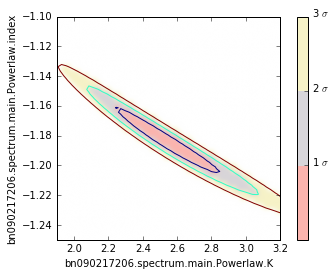

In [11]:
res = jl.get_contours(powerlaw.index,-1.25,-1.1,50,powerlaw.K,1.9,3.2,50)

In [8]:
powerlaw.index.prior = Uniform_prior(lower_bound=-5.0, upper_bound=5.0)
powerlaw.K.prior = Log_uniform_prior(lower_bound=1.0, upper_bound=10)

bayes = BayesianAnalysis(model, data_list)


cpl.index.prior = Uniform_prior(lower_bound=-5.0, upper_bound=5.0)
cpl.K.prior = Log_uniform_prior(lower_bound=1.0, upper_bound=10)
cpl.xc.prior = Log_uniform_prior(lower_bound=1.0, upper_bound=1e4)


bayes2 = BayesianAnalysis(model2, data_list)

In [23]:
samples = bayes.sample(n_walkers=50,burn_in=100, n_samples=1000)

#Running burn-in of 100 samples...

# [*********************100%***********************]  100 of 100 completed in 2.4 s

#Sampling...

# [*********************100%***********************]  1000 of 1000 completed in 22.6 s
#Mean acceptance fraction: 0.71655

Running burn-in of 100 samples...


Sampling...


Mean acceptance fraction: 0.71304


In [21]:
fig = bayes.corner_plot(plot_contours=False, plot_density=False)

NameError: name 'bayes' is not defined

In [14]:
mean_deviance = -2 * np.mean(bayes.log_probability)

In [14]:
bayes.sample_parallel_tempering(10,50,100,1000)

Running burn-in of 100 samples...


Sampling...



OrderedDict([('bn090217206.spectrum.main.Powerlaw.K',
              array([ 2.16922465,  2.68187449,  2.87440999, ...,  2.64968976,
                      3.07540871,  6.22876715])),
             ('bn090217206.spectrum.main.Powerlaw.index',
              array([-1.15339414, -1.20014062, -1.20575372, ..., -0.07864501,
                     -3.88067342, -3.57469592]))])

In [16]:
bayes.sampler.thermodynamic_integration_log_evidence()

(-873.3626247332686, 1.6227027360201873)

In [12]:
_=bayes.sample_multinest(400, resume=False)


Sampling...

MULTINEST has its own convergence criteria... you will have to wait blindly for it to finish
If INS is enabled, one can monitor the likelihood in the terminal for completion information
  analysing data from chains/fit-.txt


In [13]:
_=bayes2.sample_multinest(400, resume=False)


Sampling...

MULTINEST has its own convergence criteria... you will have to wait blindly for it to finish
If INS is enabled, one can monitor the likelihood in the terminal for completion information
  analysing data from chains/fit-.txt


In [14]:
m = ModelComparison(bayes,bayes2)

In [16]:
m.report(precision=3,sort='dof')

,Model,-2 ln(like),AIC,BIC,DIC,log10 (Z),N. Free Parameters,Eff. N. Free Parameters,dof
1,Cutoff_powerlaw,"1,643.70","1,649.70","1,657.99","1,655.24",-363.10,3,3.88,114
0,Powerlaw,"1,630.83","1,634.83","1,640.36","1,618.23",-354.13,2,-0.00,115


In [28]:
bayes._analysis_type

'bayesian'

In [31]:
np.unique([bayes._analysis_type,bayes._analysis_type,'crap'])

array(['bayesian', 'crap'], 
      dtype='|S8')

In [39]:
len(bayes._free_parameters.values())

2

In [43]:
bayes._likelihood_model.

* bn090217206 (point source): 
    * position: 
      * ra: 
        * value: 204.9
        * desc: Right Ascension
        * min_value: 0.0
        * max_value: 360.0
        * unit: deg
      * dec: 
        * value: -8.4
        * desc: Declination
        * min_value: -90.0
        * max_value: 90.0
        * unit: deg
      * equinox: J2000
    * spectrum: 
      * main: 
        * Powerlaw: 
          * K: 
            * value: 2.0
            * desc: Normalization (differential flux at the pivot value)
            * min_value: None
            * max_value: None
            * unit: 1 / (cm2 keV s)
          * piv: 
            * value: 1.0
            * desc: Pivot value
            * min_value: None
            * max_value: None
            * unit: keV
          * index: 
            * value: -1.0
            * desc: Photon index
            * min_value: -10.0
            * max_value: 10.0
            * unit:

In [53]:
for i, (parameter_name, parameter) in enumerate(jl._free_parameters.iteritems()):
    
    print parameter_name.split('.')



['bn090217206', 'spectrum', 'main', 'composite', 'K_1']
['bn090217206', 'spectrum', 'main', 'composite', 'index_1']
['bn090217206', 'spectrum', 'main', 'composite', 'K_2']
['bn090217206', 'spectrum', 'main', 'composite', 'kT_2']


In [57]:
powerlaw.description

'(Powerlaw{1} + Blackbody{2})'

In [62]:
jl.current_minimum

830.4545887183152

In [63]:
jl.fit()

Best fit values:



#,Name,Best fit value,Unit
0,bn090217206.spectrum.main.composite.K_1,1.88 +/- 0.22,1 / (cm2 keV s)
1,bn090217206.spectrum.main.composite.index_1,-1.200 +/- 0.023,
2,bn090217206.spectrum.main.composite.K_2,(6.4 +/- 1.3)e-06,1 / (cm2 keV3 s)
3,bn090217206.spectrum.main.composite.kT_2,43.8 +/- 2.8,keV



NOTE: errors on parameters are approximate. Use get_errors().

(no nuisance parameters)

Correlation matrix:



1.00,-0.89,-0.51,0.42
-0.89,1.00,0.42,-0.55
-0.51,0.42,1.00,-0.86
0.42,-0.55,-0.86,1.00



Values of -log(likelihood) at the minimum:



,-log(likelihood)
total,823.882309
NaI6,823.882309


(                                                 value     error
 bn090217206.spectrum.main.composite.K_1       1.876095  0.218240
 bn090217206.spectrum.main.composite.index_1  -1.200024  0.022677
 bn090217206.spectrum.main.composite.K_2       0.000006  0.000001
 bn090217206.spectrum.main.composite.kT_2     43.822694  2.794546,
        -log(likelihood)
 total        823.882309
 NaI6         823.882309)

In [20]:
jl._analysis_type

'mle'

In [16]:
a=[]

In [17]:
a.append(None)

In [18]:
a

[None]